<div style="font-family:Tahoma; font-size:16px; direction:rtl; color:blue;">
 MLP= multilayer perceptron
    <br>
    پرسپترون شبکه ی پایه است.
    <br>هدف این شبکه این است که خطی پیدا کنیم که فضا را به دو قسمت بشکند.
    <br>
    وقتی بیش از 1 لایه داریم شبکه mlp میشود.
    </div>

<div style="font-family:Tahoma; font-size:16px; direction:rtl; color:Blue;">
 معرفی کتابخانه های مورد استفاده
    </div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

<div style="font-family:Tahoma; font-size:16px; direction:rtl; color:Blue;">
از 0 تا 10 با فاصله ی 0.05 عدد تولید میکند و داخل آرایه میریزد.آرایه را درون X میریزد.
    </div>

In [2]:
X=np.linspace(0, 10, int((10-0)/0.05+1))
print(X)


[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15
  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75
  4.8   4.85  4.9   4.95  5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35
  5.4   5.45  5.5   5.55  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95
  6.    6.05  6.1   6.15  6.2   6.25  6.3   6.35  6.4   6.45  6.5   6.55
  6.6   6.65  6.7   6.75  6.8   6.85  6.9   6.95  7.    7.05  7.1   7.15
  7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.55  7.6   7.65  7.7   7.75
  7.8   7.85  7.9   7.95  8.    8.05  8.1   8.15  8

<div style="font-family:Tahoma; font-size:16px; direction:rtl; color:Blue;">
سینوس X را میگیرد و ضرب در عددی میکند و داخل Y میریزد.
    </div>

In [3]:
Y = 0.001*X**2 + X*np.sin(X)
print(Y)

[ 0.00000000e+00  2.50145846e-03  9.99334166e-03  2.24382199e-02
  3.97738662e-02  6.19134898e-02  8.87460620e-02  1.20136733e-01
  1.55927337e-01  1.95936990e-01  2.39962769e-01  2.87780476e-01
  3.39145484e-01  3.93793664e-01  4.51442381e-01  5.11791570e-01
  5.74524873e-01  6.39310844e-01  7.05804219e-01  7.73647230e-01
  8.42470985e-01  9.11896887e-01  9.81538096e-01  1.05100103e+00
  1.11988690e+00  1.18779327e+00  1.25431564e+00  1.31904903e+00
  1.38158962e+00  1.44153634e+00  1.49849248e+00  1.55206733e+00
  1.60187776e+00  1.64754980e+00  1.68872018e+00  1.72503791e+00
  1.75616574e+00  1.78178163e+00  1.80158017e+00  1.81527394e+00
  1.82259485e+00  1.82329536e+00  1.81714967e+00  1.80395490e+00
  1.78353209e+00  1.75572719e+00  1.72041199e+00  1.67748488e+00
  1.62687163e+00  1.56852602e+00  1.50243036e+00  1.42859598e+00
  1.34706357e+00  1.25790343e+00  1.16121568e+00  1.05713023e+00
  9.45806820e-01  8.27434835e-01  7.02233055e-01  5.70449310e-01
  4.32360024e-01  2.88269

<div style="font-family:Tahoma; font-size:16px; direction:rtl; color:Blue;">
عددهای تصادفی را در اندازه ی ابعاد X ضرب میکند و داخل noise میریزد.
میانگین noise را از خود noise کم میکند و دوباره داخل noise میریزد.
    </div>

In [4]:
Noise=np.random.rand(np.size(X))
Noise = Noise - np.mean(Noise)
Noisy_Y = Y+Noise
print(Noisy_Y)

[-0.45426454  0.45630589  0.16233712  0.42382272  0.44704639  0.33567707
  0.33915117 -0.08855813 -0.06178141 -0.0608489   0.5510251   0.12916329
  0.1463351   0.55969181  0.54898202  0.82329333  0.1411861   0.19910584
  0.78226643  1.12505945  1.01145983  1.19221548  1.41937856  1.25075952
  1.51591058  1.25729721  1.51781364  1.45723459  0.91635416  1.33916134
  1.08576389  1.73965009  1.79375405  1.16279403  1.22090154  1.67168253
  2.23211319  1.57996756  2.05263539  2.17990717  1.66169238  1.94548628
  1.59479185  1.82447957  1.54726774  1.42811663  1.33545595  1.65143008
  2.11021513  1.21939298  1.05874853  1.23483505  1.09351744  1.02415995
  1.3158755   0.71725434  0.58215495  0.74069936  0.88240407  0.27932956
  0.17292291  0.46172162  0.05556351 -0.20569834 -0.34254184 -0.37000024
 -0.71616773 -0.92293896 -1.2370953  -0.79458645 -1.02087219 -1.51362662
 -1.35474351 -1.68842772 -2.06554717 -2.55176143 -2.09127565 -2.65925101
 -2.26253808 -2.45374492 -2.67136176 -3.03184909 -3

<div style="font-family:Tahoma; font-size:16px; direction:rtl; color:Blue;">
عددهای تصادفی را در اندازه ی ابعاد X ضرب میکند و داخل noise میریزد.
میانگین noise را از خود noise کم میکند و دوباره داخل noise میریزد.
    </div>

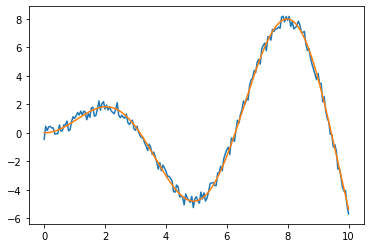

In [5]:
plt.plot(X,Noisy_Y,X,Y)

plt.show()

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(Noisy_Y,Y,test_size=0.20)

In [7]:
X_train=X_train.reshape(len(X_train),1)
X_test=X_test.reshape(len(X_test),1)

In [8]:
X_train.shape

(160, 1)

In [9]:
model = Sequential()
model.add(Dense(5, input_shape=X_train.shape, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))


In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs = 100, batch_size = 20)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 14.5548
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 14.2016
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 13.8192
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 13.4551
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 13.0962
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 12.7428
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 12.4058
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 12.0607
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 11.7052
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 11.3636
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 11.0099
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 10.6886
Epoch 13/100
8/8 [==============================]

8/8 [==============================] - 0s 1ms/step - loss: 0.0960
Epoch 97/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0957
Epoch 98/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0957
Epoch 99/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0955
Epoch 100/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0953


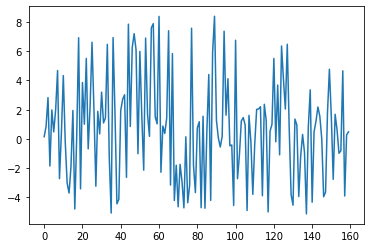

In [36]:
plt.plot(X_train)

plt.show()

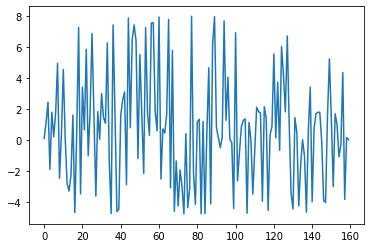

In [37]:
plt.plot(Y_train)

plt.show()

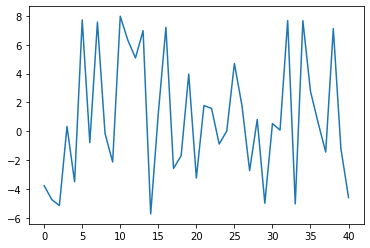

In [38]:
plt.plot(X_test)

plt.show()

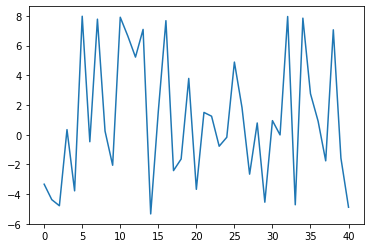

In [39]:
plt.plot(Y_test)

plt.show()